<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


#### Add your code below following the instructions given in the course


Import the required libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# Task 3: Load in the Dataset in your Jupyter Notebook

In [20]:
# Load the Boston housing dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4: Generate Descriptive Statistics and Visualizations

### 4.1 For the "Median value of owner-occupied homes" provide a boxplot

Text(0, 0.5, "MEDV (in $1000's)")

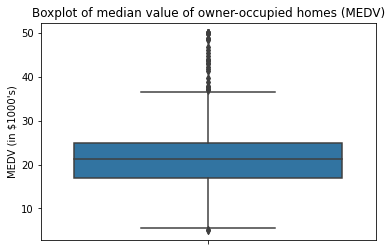

In [3]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Boxplot of median value of owner-occupied homes (MEDV)')
ax.set_ylabel('MEDV (in $1000\'s)')

### 4.2 Provide a bar plot for the Charles river variable

Text(0.5, 1.0, 'Bar plot of Charles River dummy variable (CHAS) (1 if tract bounds river; 0 otherwise)')

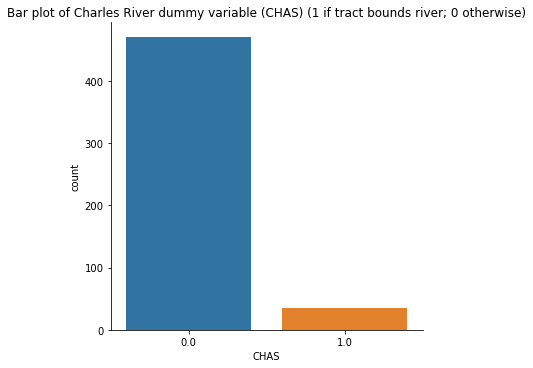

In [4]:
ax = sns.catplot(x="CHAS", kind='count', data=boston_df)
plt.title('Bar plot of Charles River dummy variable (CHAS) (1 if tract bounds river; 0 otherwise)')

### 4.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0, 0.5, "MEDV (in $1000's)")

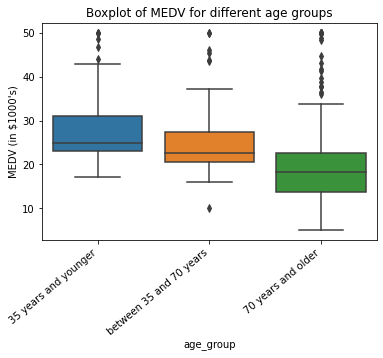

In [5]:
# Discretize the age variable
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
# Rearrange the categories
boston_df['age_group'] = pd.Categorical(boston_df['age_group'], ['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Create the boxplot
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
ax.set_title('Boxplot of MEDV for different age groups')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('MEDV (in $1000\'s)')

### 4.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Scatter plot of nitric oxide concentrations (NOX) vs the proportion of non-retail business acres per town (INDUS)')

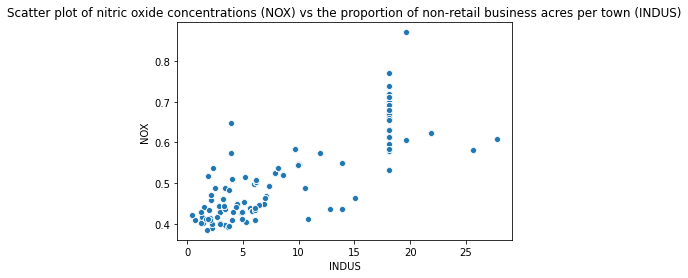

In [6]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title('Scatter plot of nitric oxide concentrations (NOX) vs the proportion of non-retail business acres per town (INDUS)')

**Conclusion:** There is a positive relationship between INDUS and NOX.

### 4.5 Create a histogram for the pupil to teacher ratio variable

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Histogram of the pupil to teacher ratio (PTRATIO)')

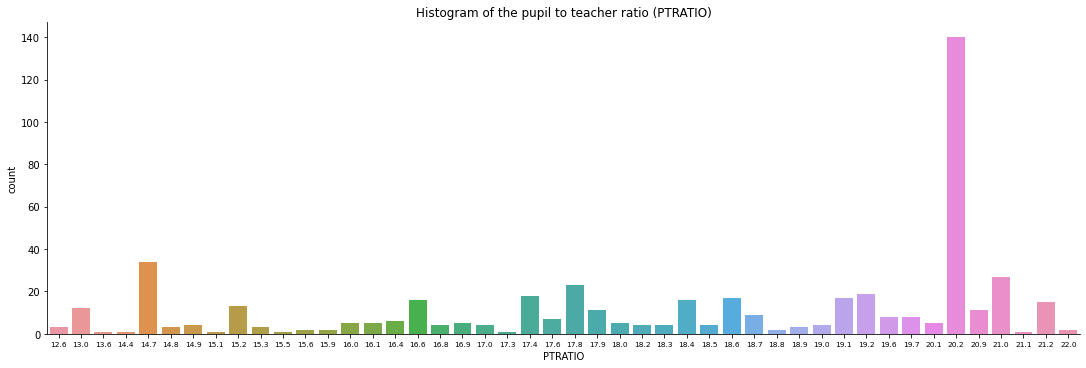

In [7]:
plt.rcParams["xtick.labelsize"] = 7.5
ax = sns.catplot(x='PTRATIO', kind='count', data=boston_df, size=5, aspect=3)
plt.title('Histogram of the pupil to teacher ratio (PTRATIO)')

# Task 5: Use the appropriate tests to answer the questions provided

### 5.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**State the hypothesis**

𝐻_0: There is no difference in median value of houses bounded by the Charles river<br>
𝐻_1: There is a difference in median value of houses bounded by the Charles river

In [11]:
# Assume equality of variance
# T-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses median value of houses bounded by the Charles riverbounded by the Charles river or not.

### 5.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**State the hypothesis**

𝐻_0: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)<br>
𝐻_1: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [17]:
# Levene's test
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# Since the p-value is greater than 0.05 we can assume equality of variance.

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [16]:
thirty_younger = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirty_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

# ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirty_younger, thirty_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than alpha value 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### 5.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**State the hypothesis**

𝐻_0: Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town<br>
𝐻_1: Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [18]:
# Pearson correlation
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209149, 7.913361061240043e-98)

**Conclusion:** Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between proportion of non-retail business acres per town and nitric oxide concentrations.

### 5.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**State the hypothesis**

𝐻_0: The weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes<br>
𝐻_1: The weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes

In [22]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        12:28:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis as there is evidence that the weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes.